In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
tips = sns.load_dataset('tips')
diamonds = sns.load_dataset('diamonds')
titanic = sns.load_dataset('titanic')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Scatter plot

<Axes: xlabel='total_bill', ylabel='tip'>

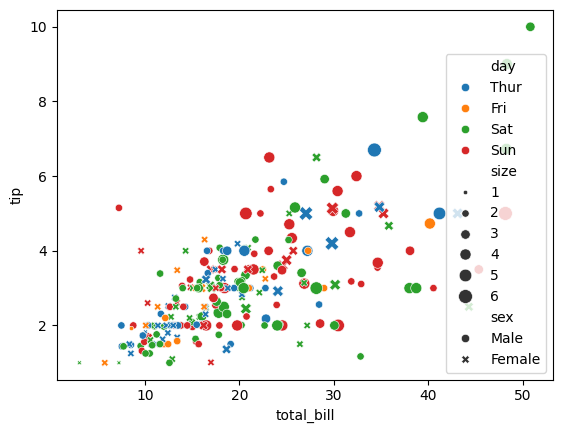

In [10]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day',
                size='size', sizes=(10, 100), style='sex')

# Histogram

In [21]:
np.sqrt(len(tips.tip))

15.620499351813308

Text(0.5, 1.0, 'Total bill destribution')

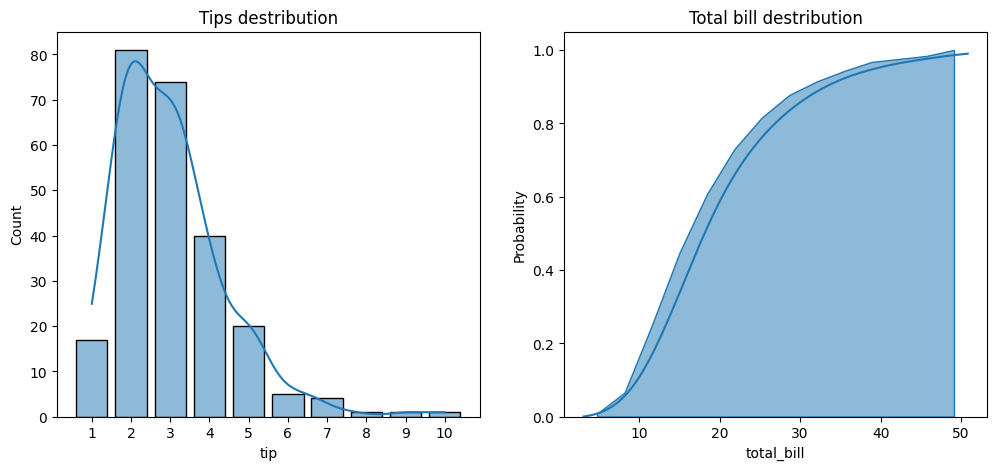

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(tips.tip, ax=ax1, kde=True, bins=[1, 1.5, 2, 2.5, 3.5, 5, 7, 10],
             discrete=True, shrink=.8)
ax1.set_xticks(np.arange(1, 11))
ax1.set_title('Tips destribution')

sns.histplot(tips.total_bill, ax=ax2, kde=True, stat='probability', cumulative=True, element='poly')
ax2.set_title('Total bill destribution')

# Bar plot

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='day', ylabel='tip'>

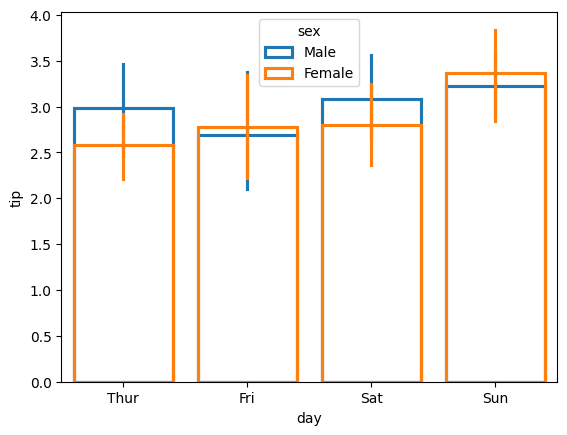

In [55]:
sns.barplot(data=tips, x='day', y='tip', estimator='mean', hue='sex', errorbar=('ci', 95),
            dodge=False, fill=False)

# Count plot

<Axes: xlabel='day', ylabel='count'>

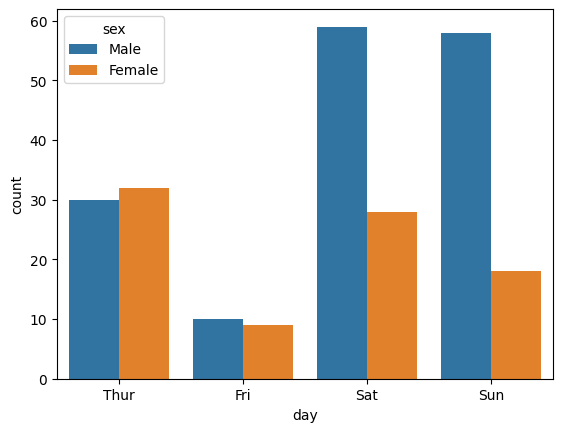

In [56]:
sns.countplot(data=tips, x='day', hue='sex')

# Box plot

<Axes: xlabel='day', ylabel='tip'>

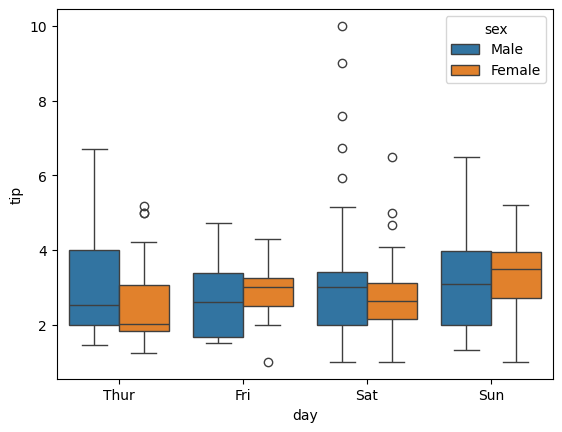

In [58]:
sns.boxplot(data=tips, x='day', y='tip', hue='sex')

IQR = Q3 - Q1 \
Upper Fence = Q3 + 1.5\*IQR \
Lower Fence = Q1 - 1.5*IQR

# Strip plot

<Axes: xlabel='tip', ylabel='day'>

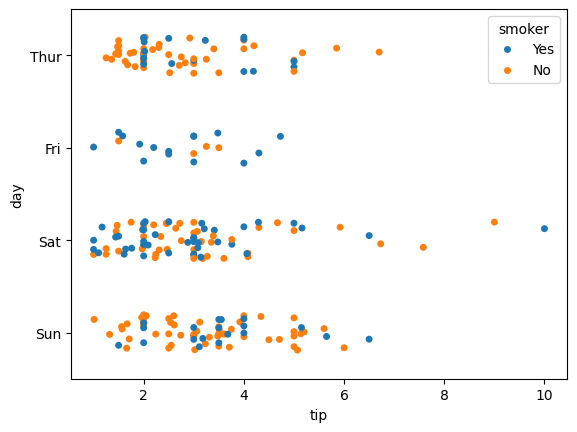

In [62]:
sns.stripplot(data=tips, y='day', x='tip', hue='smoker', jitter=.2, orient='h')

# Swarmplot

<Axes: xlabel='day', ylabel='total_bill'>

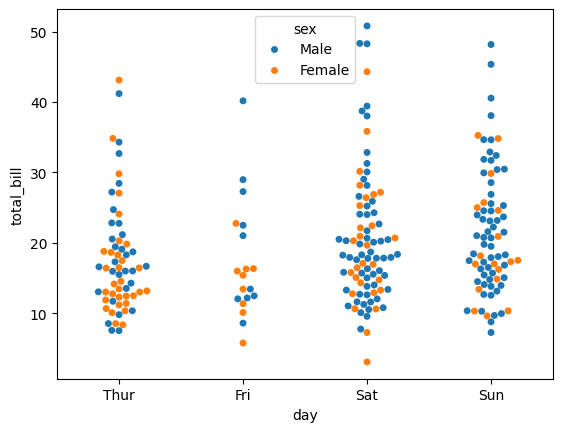

In [64]:
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex')

# Heatmap

In [65]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [66]:
d_corr = diamonds.corr(numeric_only=True)
d_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [73]:
mask = np.triu(d_corr)

In [75]:
mask.round(2)

array([[ 1.  ,  0.03,  0.18,  0.92,  0.98,  0.95,  0.95],
       [ 0.  ,  1.  , -0.3 , -0.01, -0.03, -0.03,  0.09],
       [ 0.  ,  0.  ,  1.  ,  0.13,  0.2 ,  0.18,  0.15],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.88,  0.87,  0.86],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.97,  0.97],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.95],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

<Axes: >

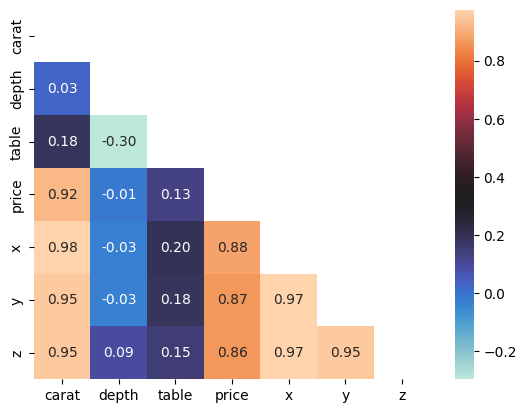

In [76]:
sns.heatmap(d_corr, annot=True, fmt='.2f', cmap='icefire', mask=mask)

# Jointplot

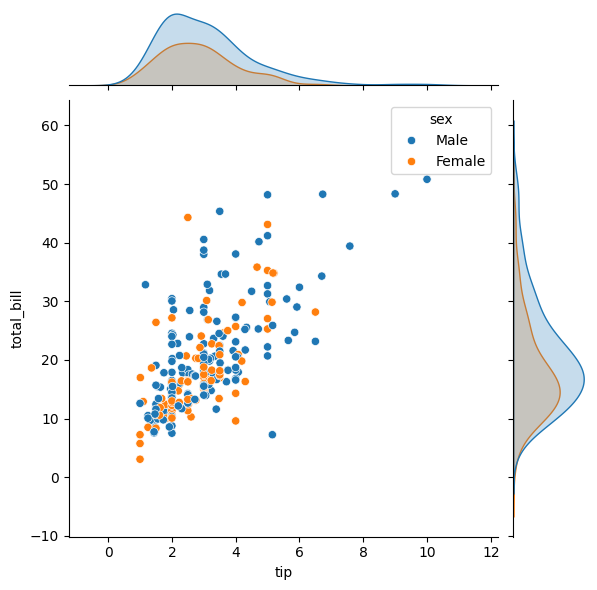

In [77]:
sns.jointplot(data=tips, x='tip', y='total_bill', hue='sex')

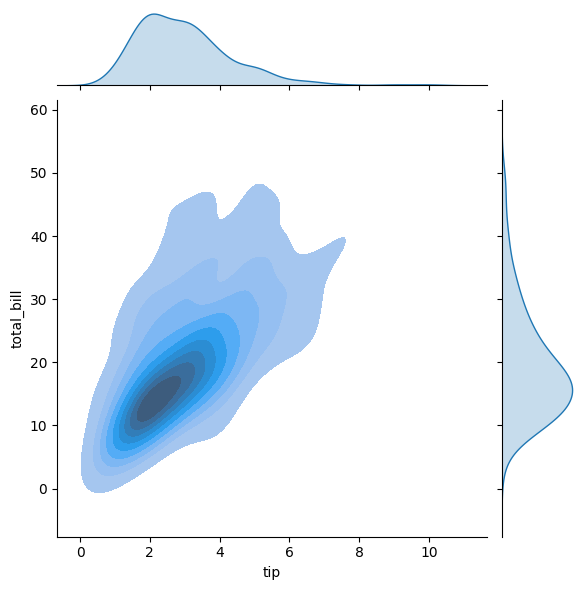

In [80]:
sns.jointplot(data=tips, x='tip', y='total_bill', kind='kde', fill=True)

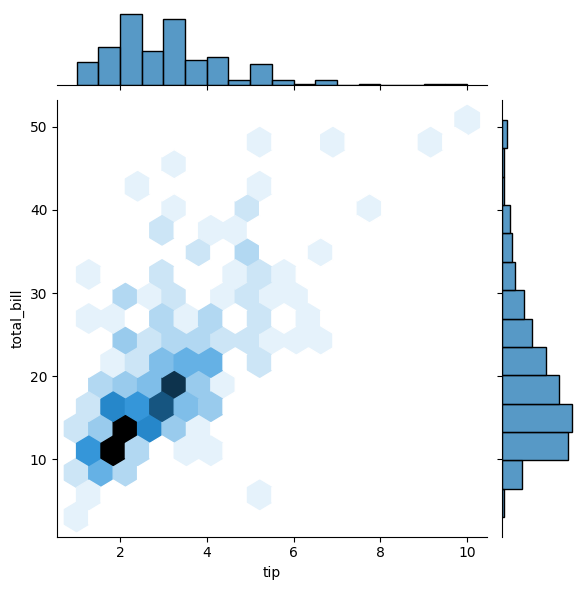

In [81]:
sns.jointplot(data=tips, x='tip', y='total_bill', kind='hex')

# Pairplot

In [82]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


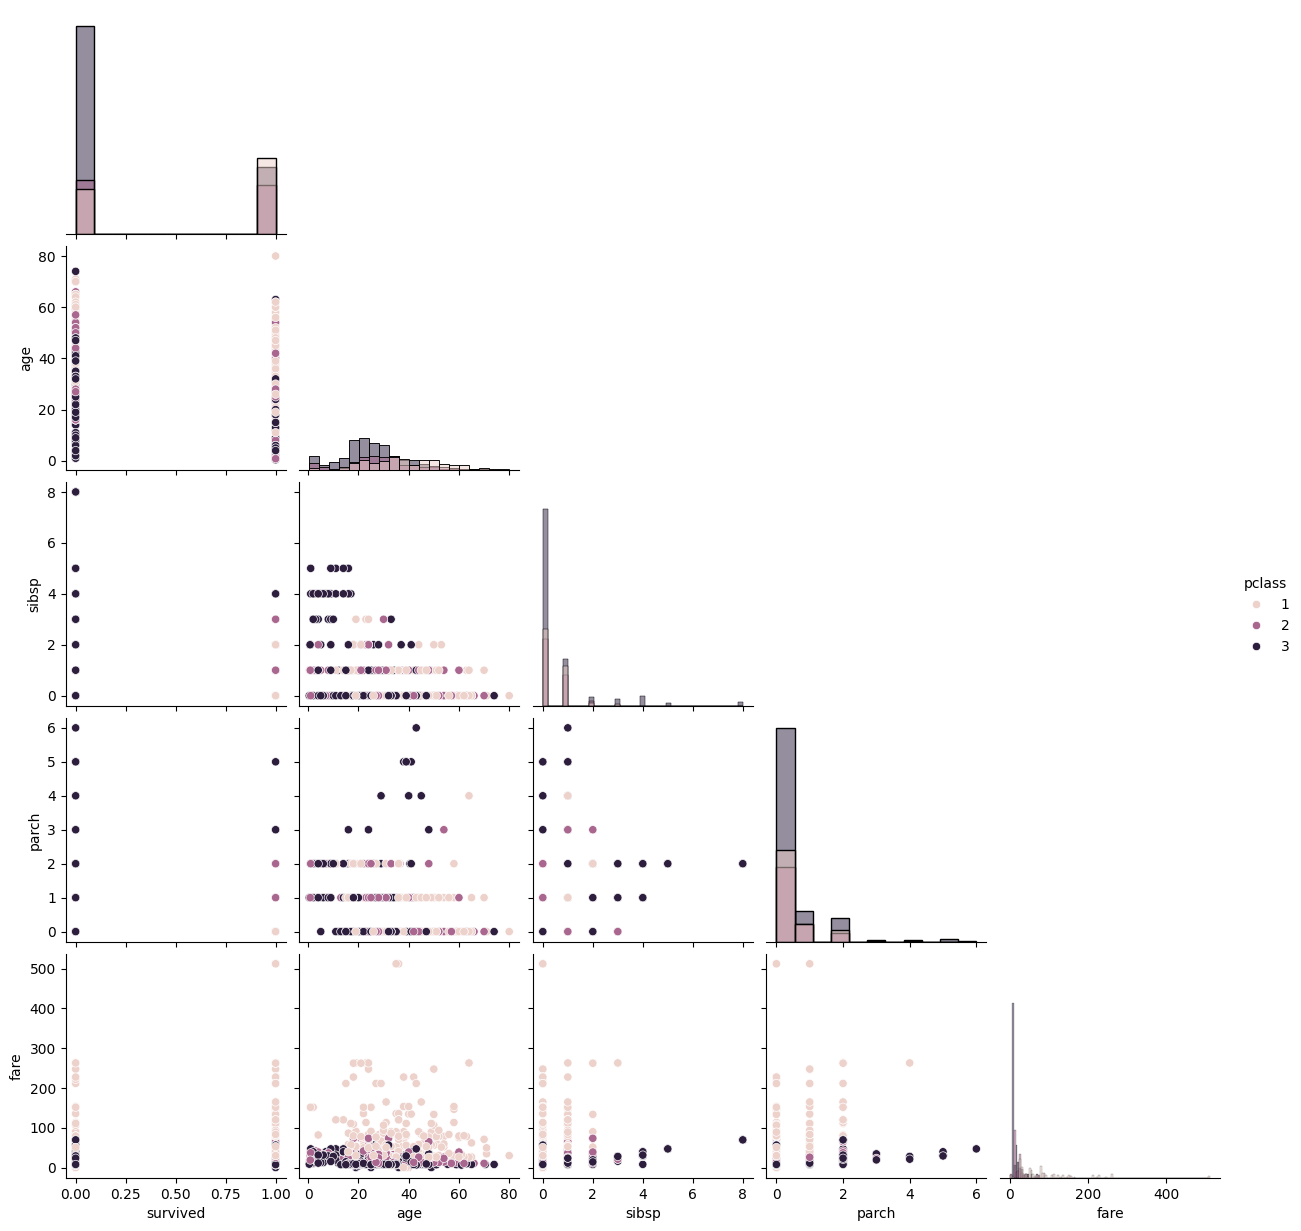

In [84]:
sns.pairplot(titanic.select_dtypes('number'), hue='pclass', diag_kind='hist', corner=True)

# Catplot

In [85]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


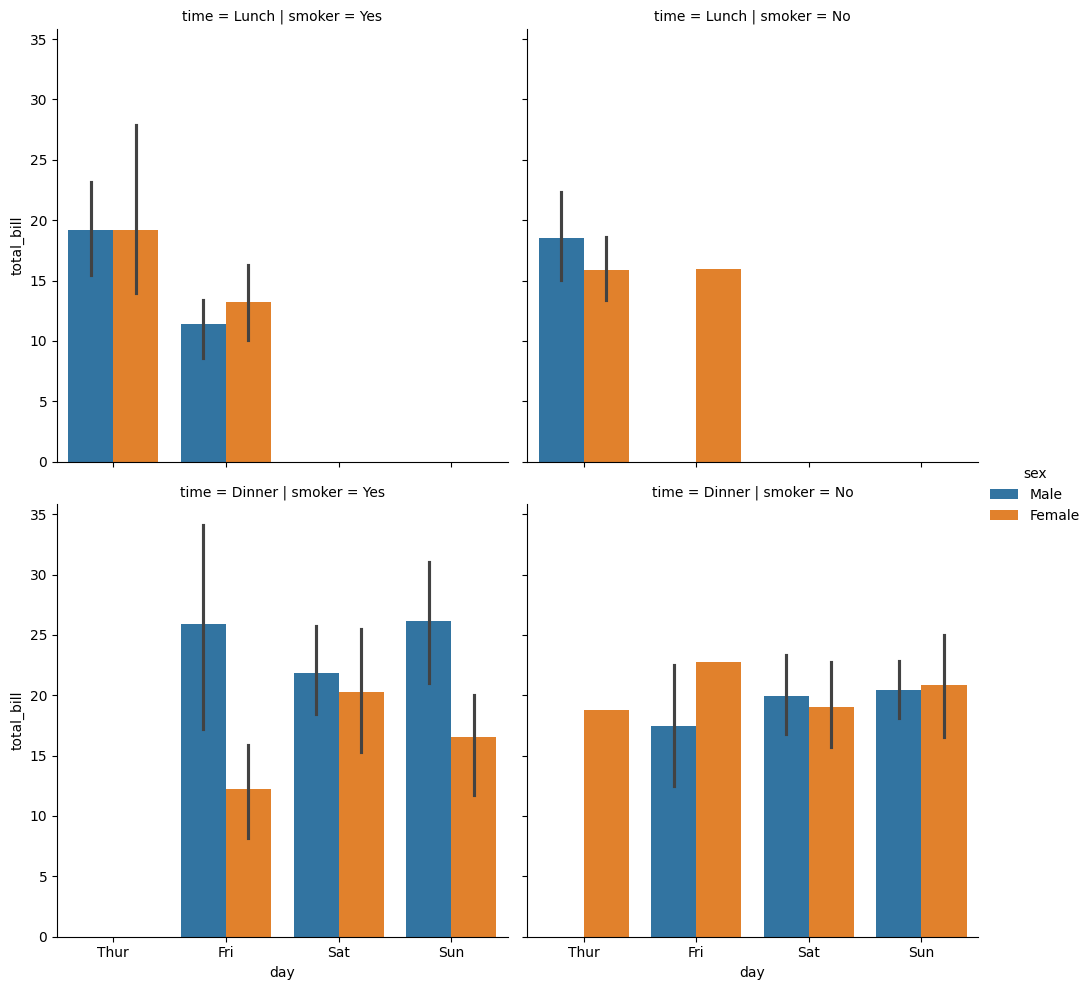

In [90]:
sns.catplot(data=tips, x='day', y='total_bill', kind='bar',
            hue='sex', col='smoker', row='time')

# Displot

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


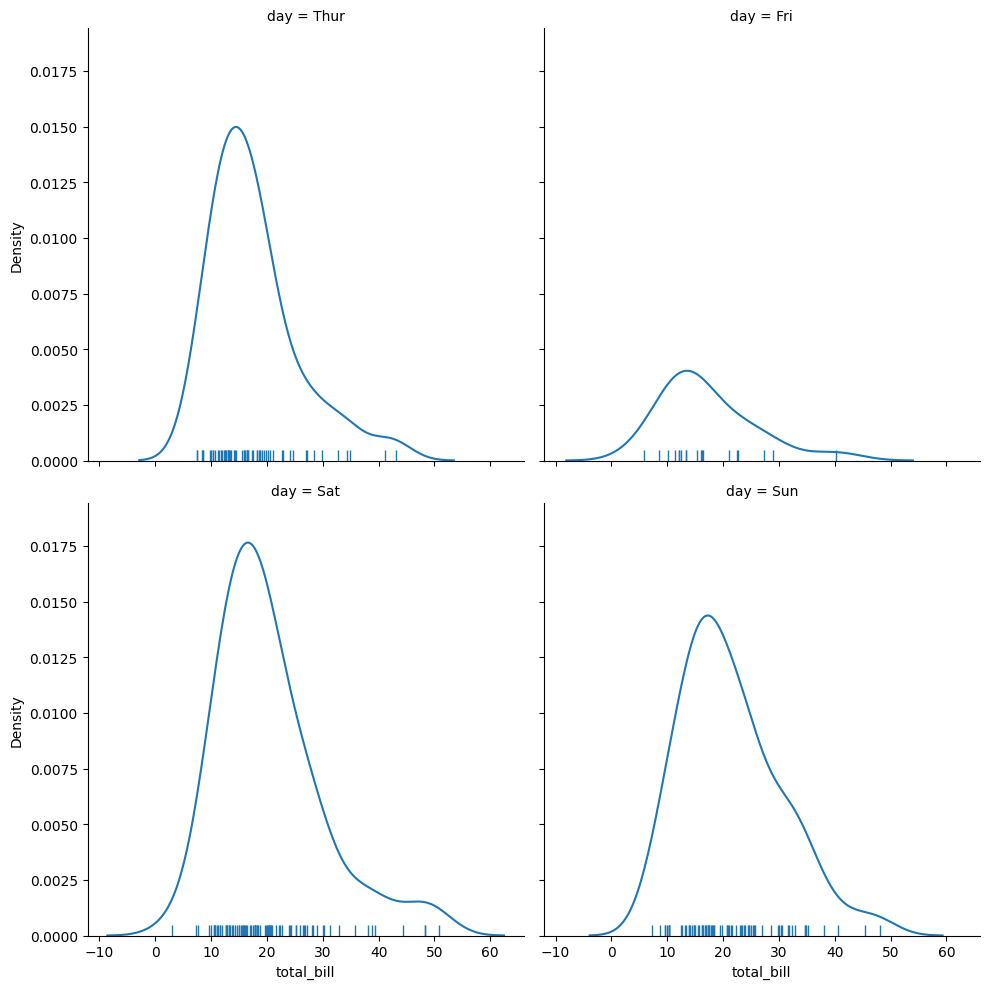

In [96]:
sns.displot(data=tips, x='total_bill', col='day', col_wrap=2, kind='kde', rug=True)

# Reg plots

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

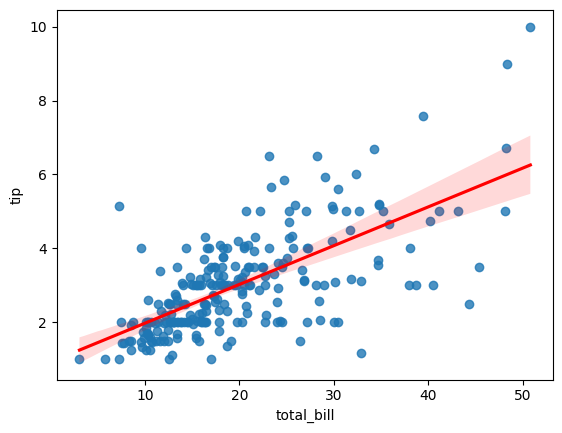

In [4]:
sns.regplot(tips, x='total_bill', y='tip', line_kws={'color': 'red'})

<Axes: xlabel='total_bill', ylabel='tip'>

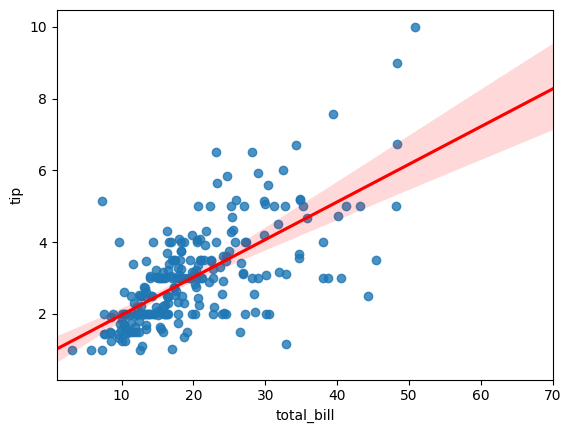

In [5]:
plt.xlim(1, 70)
sns.regplot(tips, x='total_bill', y='tip', line_kws={'color': 'red'}, truncate=False)

<Axes: xlabel='total_bill', ylabel='tip'>

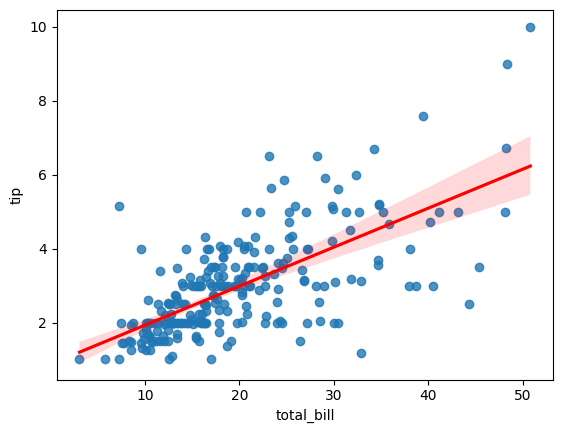

In [6]:
sns.regplot(tips, x='total_bill', y='tip', line_kws={'color': 'red'}, robust=True)

<Axes: xlabel='total_bill', ylabel='tip'>

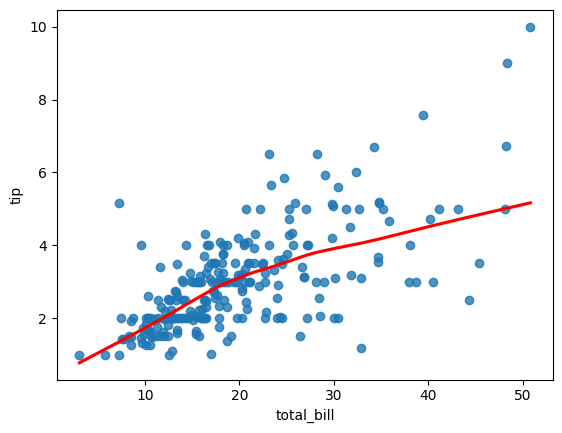

In [7]:
sns.regplot(tips, x='total_bill', y='tip', line_kws={'color': 'red'}, lowess=True)

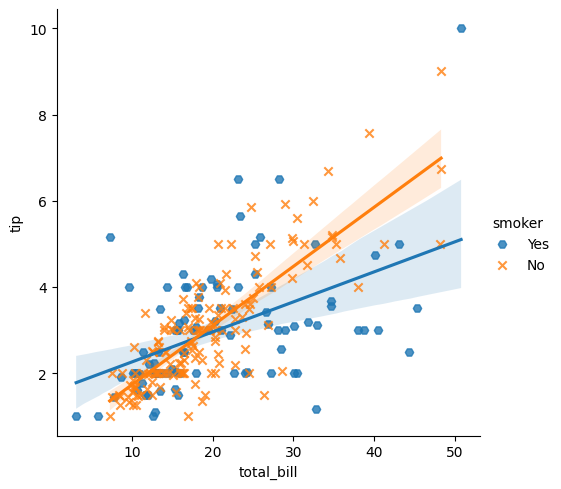

In [9]:
sns.lmplot(tips, x='total_bill', y='tip', hue='smoker', markers=['H', 'x'])

C:\Users\USER\AppData\Local\Temp\ipykernel_29440\189277474.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=tips.sex.replace(['Male', 'Female'], [1, 0]),
C:\Users\USER\AppData\Local\Temp\ipykernel_29440\189277474.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y=tips.sex.replace(['Male', 'Female'], [1, 0]),


<Axes: xlabel='total_bill', ylabel='sex'>

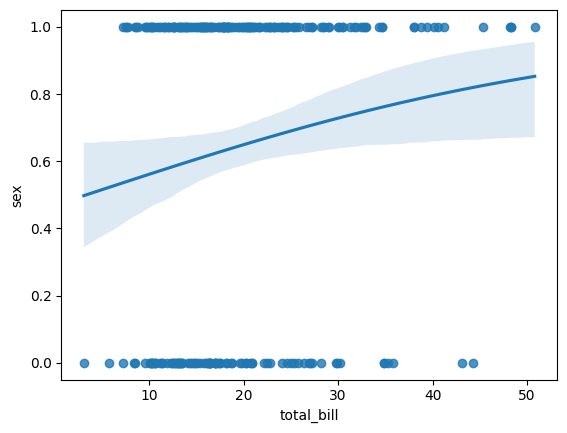

In [13]:
sns.regplot(data=tips,
            x='total_bill',
            y=tips.sex.replace(['Male', 'Female'], [1, 0]),
            logistic=True
           )